In [1]:
!pip install gymnasium[atari] gymnasium[accept-rom-license] ale-py autorom


In [2]:
!AutoROM --accept-license


AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	C:\Users\thoma\anaconda3\Lib\site-packages\AutoROM\roms

Existing ROMs will be overwritten.


In [3]:
import ale_py
import gymnasium as gym

env = gym.make("ALE/Tennis-v5")
env


<OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/Tennis-v5>>>>

In [4]:
import gymnasium as gym
gym.make("ALE/Tennis-v5")


<OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/Tennis-v5>>>>

In [5]:
import gymnasium as gym
import numpy as np
import time
import matplotlib.pyplot as plt

from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.atari_wrappers import AtariWrapper


In [6]:
def make_env():
    env = gym.make("ALE/Tennis-v5", frameskip=1)
    env = AtariWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env])
env = VecFrameStack(env, n_stack=4)


In [7]:
start = time.time()

dqn = DQN(
    "CnnPolicy",
    env,
    learning_rate=1e-4,
    buffer_size=100000,
    learning_starts=10000,
    batch_size=32,
    gamma=0.99,
    train_freq=4,
    target_update_interval=1000,
    verbose=1
)

dqn.learn(total_timesteps=300000)

dqn_time = time.time() - start
dqn_reward, _ = evaluate_policy(dqn, env, n_eval_episodes=10)

dqn_reward, dqn_time


Using cpu device
Wrapping the env in a VecTransposeImage.


c:\Users\thoma\anaconda3\Lib\site-packages\stable_baselines3\common\buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 5.65GB > 1.01GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -24      |
|    exploration_rate | 0.795    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1004     |
|    time_elapsed     | 6        |
|    total_timesteps  | 6484     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.62e+03 |
|    ep_rew_mean      | -24      |
|    exploration_rate | 0.589    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 331      |
|    time_elapsed     | 39       |
|    total_timesteps  | 12986    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000176 |
|    n_updates        | 746      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

(-0.9, 3155.2400228977203)

In [8]:
start = time.time()

ppo = PPO(
    "CnnPolicy",
    env,
    learning_rate=2.5e-4,
    n_steps=128,
    batch_size=64,
    gamma=0.99,
    verbose=1
)

ppo.learn(total_timesteps=300000)

ppo_time = time.time() - start
ppo_reward, _ = evaluate_policy(ppo, env, n_eval_episodes=10)

ppo_reward, ppo_time


Using cpu device
Wrapping the env in a VecTransposeImage.
----------------------------
| time/              |     |
|    fps             | 287 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 128 |
----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 137        |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 256        |
| train/                  |            |
|    approx_kl            | 0.02336929 |
|    clip_fraction        | 0.209      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.88      |
|    explained_variance   | -0.092     |
|    learning_rate        | 0.00025    |
|    loss                 | -0.0292    |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0381    |
|    value_loss           | 0.308      |
----------------------------------------
-

(-0.9, 2854.704550266266)

In [9]:
start = time.time()

a2c = A2C(
    "CnnPolicy",
    env,
    learning_rate=7e-4,
    gamma=0.99,
    verbose=1
)

a2c.learn(total_timesteps=300000)

a2c_time = time.time() - start
a2c_reward, _ = evaluate_policy(a2c, env, n_eval_episodes=10)

a2c_reward, a2c_time


Using cpu device
Wrapping the env in a VecTransposeImage.
------------------------------------
| time/                 |          |
|    fps                | 168      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.89    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0256   |
|    value_loss         | 9.6e-05  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 169      |
|    iterations         | 200      |
|    time_elapsed       | 5        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -2.87    |
|    explained_variance | 0.219    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss 

(-22.5, 1989.7707862854004)

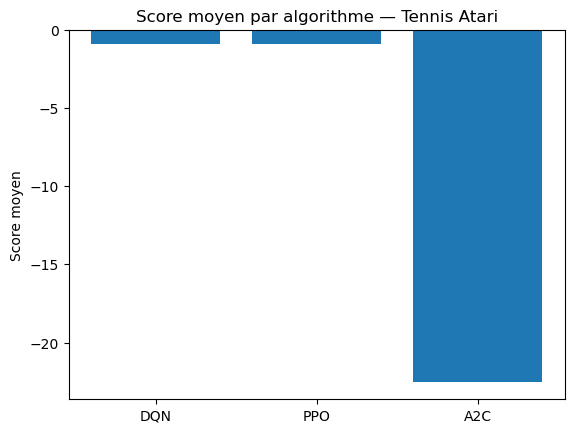

DQN Score moyen: -0.9 Temps: 3155.2400228977203
PPO Score moyen: -0.9 Temps: 2854.704550266266
A2C Score moyen: -22.5 Temps: 1989.7707862854004


In [10]:
algos = ["DQN", "PPO", "A2C"]
scores = [dqn_reward, ppo_reward, a2c_reward]
times = [dqn_time, ppo_time, a2c_time]

plt.figure()
plt.bar(algos, scores)
plt.title("Score moyen par algorithme — Tennis Atari")
plt.ylabel("Score moyen")
plt.show()

for a, s, t in zip(algos, scores, times):
    print(a, "Score moyen:", s, "Temps:", t)
